In [294]:
# importing all the necessary libraries 
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

# To ignore future warning during implimentation
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set()

# To call the train test and split method
from sklearn.model_selection import train_test_split


In [295]:
# this was helpful in removing the warnings of max iteration has reached 
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

In [296]:
# The path to the csv file to succesfully load it into jupyter notebook

iris_data = pd.read_csv("C:/Users/Raj Patel/Documents/college/machine learning frameworks/iris.csv")
iris_data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [297]:
# To find data-types of all availabel columns in the dataset, here we can observe that only "variety" is only column that is in
# object data-type, we will convert it to numeric data-type later on. 

iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [298]:
# Describe is a method to get the all the statistical info about our dataset. 
# As we can see it gives the mean,standrad deviation as well as minimum and maximum of columns. 

iris_data.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [299]:
# Here we can get the mean by "group by" method 

iris_data.groupby('variety').mean()

,sepal.length,sepal.width,petal.length,petal.width
variety,,,,
Setosa,5.006,3.428,1.462,0.246
Versicolor,5.936,2.770,4.260,1.326
Virginica,6.588,2.974,5.552,2.026


In [300]:
# "isnull" method is used to find that is there any null value in our dataset.
#  without sum() method isnull will return value in bolean data-type.
# by observation we can see that there is no missing value in our dataset.

iris_data.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

  here we have plot the the statistical data into chart format. used graph is Histogram.
  
  hist() is the simplest method to plot histogram.
  
  By observing below charts it is clear that sepal length and width are normally distributed while petal length and width are     not.
  
  Also Highest frequency of all features can be observed by this graph. Example: highest frequency of sepal length is between     5.5 to 6.5. 

<AxesSubplot:>

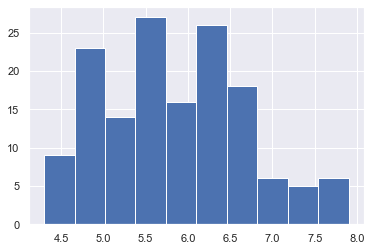

In [301]:
iris_data['sepal.length'].hist()

<AxesSubplot:>

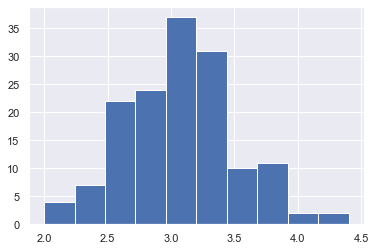

In [302]:
iris_data['sepal.width'].hist()

<AxesSubplot:>

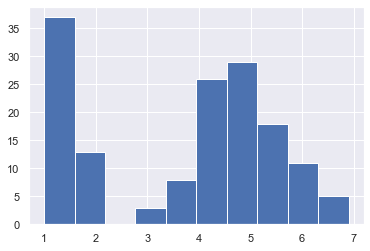

In [303]:
iris_data['petal.length'].hist()

<AxesSubplot:>

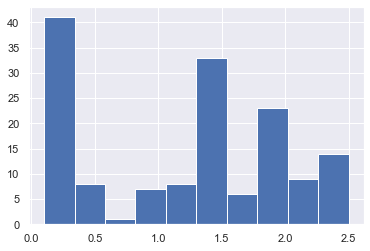

In [304]:
iris_data['petal.width'].hist()

 Here i have used facetgrid from seaborn library to visualize relation of 'variety' with other features.
 
 Observation of below graph:
 
 1) features are very much overlapping each other so we can not use it as effective classification feature
 2) It is same as plot 1
 3) iris_setosa can be easily seperated from other two 
 4) Again other values are overlapping but setosa can be easily identify.
 
 In hue we tagert which column we want to find relation, palettle : just for color


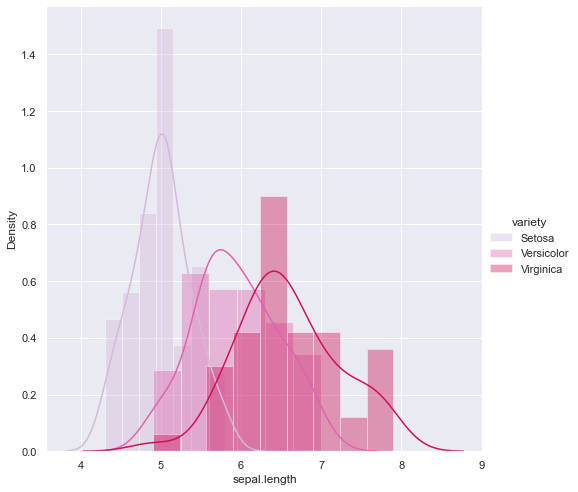

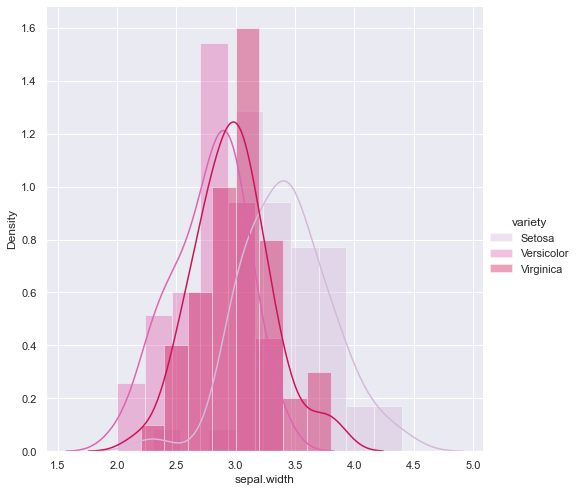

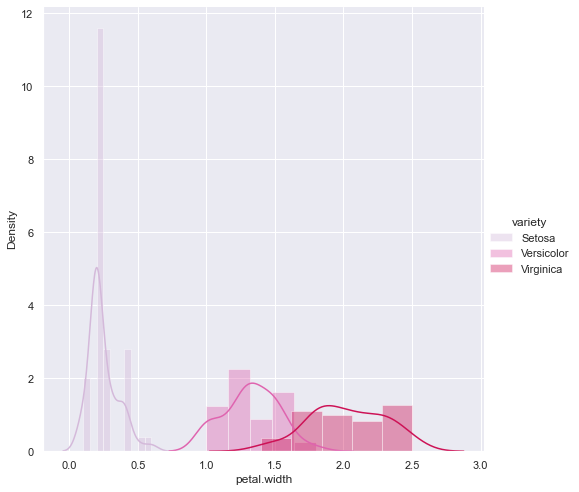

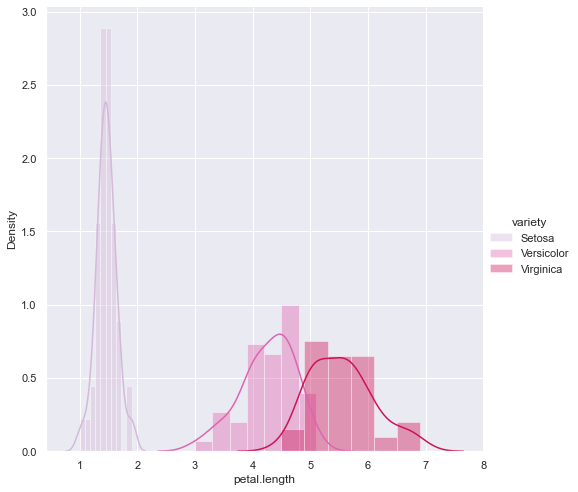

In [305]:
sns.FacetGrid(iris_data, hue="variety", palette='PuRd', height=7).map(sns.distplot, "sepal.length").add_legend()

sns.FacetGrid(iris_data, hue="variety", palette='PuRd' ,height=7).map(sns.distplot, "sepal.width").add_legend()

sns.FacetGrid(iris_data, hue="variety", palette='PuRd', height=7).map(sns.distplot, "petal.width").add_legend()

sns.FacetGrid(iris_data, hue="variety",palette='PuRd', height=7).map(sns.distplot, "petal.length").add_legend()

plt.show()





 Above we have seen the visulization of data from now we are implimenting the statistical approach to clean data and build the     
 model.
 
 i just reupload the dataset just to seperate EDA and Implementation part 
 
 
 
 

In [306]:
ird = pd.read_csv('C:/Users/Raj Patel/Documents/college/machine learning frameworks/iris.csv')
ird

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [307]:
# As instructed we have to convert taget variable into numeric datatype. for that i have used the label encoding method.
from sklearn.preprocessing import LabelEncoder

In [308]:
encoding = ird['variety'].unique()         #for the unique values in column variety in our case we have three 
encoder = LabelEncoder()                   # calling the labelencoder method via object/instance
ird['variety'] = encoder.fit_transform(ird['variety'])  # with the help from fit_transform method we convert values
encoded = encoder.transform(encoding)   

In [309]:
# here it can be seen that now 'variety' column has numerical values.
ird['variety'].info 

<bound method Series.info of 0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: variety, Length: 150, dtype: int32>

 
 
 Now we are going to split our dataset in to three different part.
 1) train 
 2) validation 
 3) test
 we will use 'sepal.length''sepal.width''prtal.length''petal.width' for training phase.
 
 for spliting dataset into three part we have to do following things 
 1) first split dataset into two parts(train and test)
 2) then split the second half of dataset into two parts(validaton and test) 
 
 

In [310]:
train = ird.drop('variety', axis=1)  # by drop method we can seperate the 'variety' column for testing.
                                    #  so now train will hold the other four columns
test = ird['variety']              # assigning 'variety' column to test instance

# here first spliting datasets into two parts( train = 60 and test = 40 ) ->X1 or y1 name for 60-20-20 just for easinees to reuse it
X1_train,X1_test,y1_train,y1_test = train_test_split(train,test,test_size = 0.4,random_state=42) 
# now spliting the dataset into two parts again (validation = 20 and test = 20)
X1_test,X1_val,y1_test,y1_val = train_test_split(X1_test,y1_test,test_size = 0.5,random_state=42)

In [311]:
print(X1_train.shape,y1_train.shape) #60% of data

(90, 4) (90,)


In [312]:
print(X1_val.shape,y1_val.shape)    #20% of data

(30, 4) (30,)


In [313]:
print(X1_test.shape,y1_test.shape)  #20% of data

(30, 4) (30,)




^ Above three statements are proof that our dataset has been divided into three parts.



In [314]:
from sklearn.ensemble import RandomForestClassifier   #importing Randomforest Algorithm
from sklearn.linear_model import LogisticRegression   #importing LogisticRegression Algorithm
from sklearn.model_selection import cross_val_score   
# To call Gridsearchcv 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score  
# accuracy_score , precision_score and recall_score method to measure accuracy, precision and recall




In [360]:
#defining the function for printing the Best parameters
def print_hyperparameters(parameters):  
    print('optimal parameters are: {}\n'.format(parameters.best_params_))
    
    mean = parameters.cv_results_['mean_test_score']
    std = parameters.cv_results_['std_test_score']
    for m, s, p in zip(mean, std, parameters.cv_results_['params']):
        print('{} (+/-{}) hyperparameter for {}'.format(round(m, 4), round(s * 2, 4), p))

In [349]:
# calling logistic regression pre-defined method to impliment it 
l_regression = LogisticRegression()
# defining testing parameters to check

testing_params = {
     'C': [0.0001,0.001, 0.01, 0.1, 1, 10, 100, 1000]
            }

#  assigning gridsearchcv method to it's instance 
#  grid_cv_lr1 is an instance for 60-20-20 dataset
# here i have defined cv=7 that means it's 7 fold cross validation
grid_cv_lr1 = GridSearchCV(l_regression, testing_params, cv=7, scoring='accuracy')
grid_cv_lr1.fit(X1_train, y1_train.values.ravel())    # here .values.ravel() used to conver column to array

print_hyperparameters(grid_cv_lr1)

Best parameters are: {'C': 100}

0.4322 (+/-0.2519) hyperparameter for {'C': 0.0001}
0.6996 (+/-0.21) hyperparameter for {'C': 0.001}
0.8434 (+/-0.2366) hyperparameter for {'C': 0.01}
0.9112 (+/-0.2084) hyperparameter for {'C': 0.1}
0.9441 (+/-0.2135) hyperparameter for {'C': 1}
0.9441 (+/-0.1591) hyperparameter for {'C': 10}
0.9451 (+/-0.2131) hyperparameter for {'C': 100}
0.9341 (+/-0.2085) hyperparameter for {'C': 1000}


In [358]:
print('best hyperparameter:',grid_cv_lr1.best_params_) 
print('Accuracy:', grid_cv_lr1.best_score_)  #accuracy for logistic regression 

best hyperparameter: {'C': 100}
Accuracy: 0.945054945054945


In [353]:
l_regression.fit(X1_train,y1_train)   #fitting the method 
prediction = l_regression.predict(X1_test) # predicting on the test set

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


In [405]:
Accuracy = accuracy_score(y1_test, prediction)      #measuring accuracy
print(Accuracy)

1.0


In [407]:
Precision = precision_score(y1_test,prediction,average='micro') #measuring precision
print(Precision)

1.0


In [408]:
Recall = recall_score(y1_test,prediction, average= 'micro') #measuring recall
print(Recall)

1.0


In [ ]:


Support vector machine



In [320]:
from sklearn.svm import SVC

In [355]:
support_vector_machine = SVC()     #method for Support vector Machine
parameters = { 
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10]
}

grid_cv_svm1 = GridSearchCV(support_vector_machine, parameters, cv=8)   
grid_cv_svm1.fit(X1_train, y1_train.values.ravel())                            #fitting the gridsearch method

print_hyperparameters(grid_cv_svm1)      #below we printed the best parameters

Best parameters are: {'C': 0.1, 'kernel': 'linear'}

0.9432 (+/-0.1558) hyperparameter for {'C': 0.1, 'kernel': 'linear'}
0.8201 (+/-0.1619) hyperparameter for {'C': 0.1, 'kernel': 'rbf'}
0.9432 (+/-0.1558) hyperparameter for {'C': 1, 'kernel': 'linear'}
0.9432 (+/-0.1558) hyperparameter for {'C': 1, 'kernel': 'rbf'}
0.8987 (+/-0.2309) hyperparameter for {'C': 10, 'kernel': 'linear'}
0.9328 (+/-0.1503) hyperparameter for {'C': 10, 'kernel': 'rbf'}


In [356]:
print("Tuned Hyperparameters :", grid_cv_svm1.best_params_)  # selected best hyperparameter
print("Accuracy :",grid_cv_svm1.best_score_)                 # Accuracy score

Tuned Hyperparameters : {'C': 0.1, 'kernel': 'linear'}
Accuracy : 0.9431818181818182


In [404]:
support_vector_machine.fit(X1_train,y1_train)          #fitting the svm on training dataset 
prediction = support_vector_machine.predict(X1_test)   # predicting the model on X_test dataset


In [403]:
Accuracy =  accuracy_score(y1_test,prediction)
print(Accuracy)

1.0


In [401]:

Precision = precision_score(y1_test,prediction,average='micro')  #here i have to include the average 'micro' because it was 
                                                                #showing me the error that target is multicalss but average is binary
print(Precision)    

1.0


In [402]:
Recall = recall_score(y1_test,prediction, average='micro')
print(Recall)

1.0


In [ ]:


Random Forest Classifier



In [325]:
from sklearn.ensemble import RandomForestClassifier
#importing the random forest classifier model

In [365]:
random_forest = RandomForestClassifier()   #creating the object/instance for Random forest
parameters = {
    'n_estimators': [5, 20, 30, 100],   #number of trees in the forest 
    'max_depth': [2,5,10, None]     #maximum number of level in each tree
}

grid_cv_rf1 = GridSearchCV(random_forest, parameters, cv=7)  
grid_cv_rf1.fit(X1_train, y1_train.values.ravel())

print_hyperparameters(grid_cv_rf1)
#printing the bestparameters 

optimal parameters are: {'max_depth': 5, 'n_estimators': 5}

0.9332 (+/-0.1526) hyperparameter for {'max_depth': 2, 'n_estimators': 5}
0.9222 (+/-0.1425) hyperparameter for {'max_depth': 2, 'n_estimators': 20}
0.9112 (+/-0.1914) hyperparameter for {'max_depth': 2, 'n_estimators': 30}
0.9332 (+/-0.2087) hyperparameter for {'max_depth': 2, 'n_estimators': 100}
0.9451 (+/-0.1585) hyperparameter for {'max_depth': 5, 'n_estimators': 5}
0.9332 (+/-0.2087) hyperparameter for {'max_depth': 5, 'n_estimators': 20}
0.9222 (+/-0.2015) hyperparameter for {'max_depth': 5, 'n_estimators': 30}
0.9222 (+/-0.2015) hyperparameter for {'max_depth': 5, 'n_estimators': 100}
0.9112 (+/-0.1914) hyperparameter for {'max_depth': 10, 'n_estimators': 5}
0.9222 (+/-0.2015) hyperparameter for {'max_depth': 10, 'n_estimators': 20}
0.9112 (+/-0.1914) hyperparameter for {'max_depth': 10, 'n_estimators': 30}
0.9332 (+/-0.2087) hyperparameter for {'max_depth': 10, 'n_estimators': 100}
0.9112 (+/-0.1914) hyperparameter f

In [366]:
print("Tuned Hyperparameters :", grid_cv_rf1.best_params_)
print("Accuracy :",grid_cv_rf1.best_score_)         

Tuned Hyperparameters : {'max_depth': 5, 'n_estimators': 5}
Accuracy : 0.9450549450549451


In [400]:
random_forest.fit(X1_train,y1_train)   #again same procedure for random forest--> fitting the model on training dataset 
prediction = random_forest.predict(X1_test)       # predicting thee model 


In [395]:
Accuracy =  accuracy_score(y1_test,prediction)
print(Accuracy)

1.0


In [397]:
Precision = precision_score(y1_test,prediction, average='micro')
print(Precision)

1.0


In [399]:
Recall = recall_score(y1_test,prediction, average='micro')
print(Recall)

1.0




Above we saw dataset split into 60-20-20

Now we are going to do same procedure for spliting the dataset into 80-10-10 ratio



In [368]:
X2_train,X2_test,y2_train,y2_test = train_test_split(train,test,test_size = 0.2,random_state=42) 
# now spliting the dataset into two parts again (validation = 10 and test = 10)
X2_test,X2_val,y2_test,y2_val = train_test_split(X2_test,y2_test,test_size = 0.5,random_state=42)

In [370]:
print(X2_train.shape,y2_train.shape)

(120, 4) (120,)


In [372]:
print(X2_val.shape,y2_val.shape)

(15, 4) (15,)


In [371]:
print(X2_test.shape,y2_test.shape)

(15, 4) (15,)


In [373]:
log_regression = LogisticRegression()
# defining testing parameters to check

testing_params = {
    'C': [0.0001,0.001, 0.01, 0.1, 1, 10, 100, 1000]
            }

# gridsearchcv method
grid_cv_lr2 = GridSearchCV(log_regression, testing_params, cv=7) 
grid_cv_lr2.fit(X2_train, y2_train.values.ravel())

print_hyperparameters(grid_cv_lr2)

optimal parameters are: {'C': 1}

0.45 (+/-0.2325) hyperparameter for {'C': 0.0001}
0.8665 (+/-0.1964) hyperparameter for {'C': 0.001}
0.8763 (+/-0.2238) hyperparameter for {'C': 0.01}
0.9496 (+/-0.1714) hyperparameter for {'C': 0.1}
0.9664 (+/-0.1235) hyperparameter for {'C': 1}
0.9416 (+/-0.1541) hyperparameter for {'C': 10}
0.95 (+/-0.1594) hyperparameter for {'C': 100}
0.95 (+/-0.1594) hyperparameter for {'C': 1000}


In [374]:
print("best parameters:", grid_cv_lr2.best_params_)
print("accuracy:", grid_cv_lr2.best_score_)

best parameters: {'C': 1}
accuracy: 0.9663865546218487


In [375]:
log_regression.fit(X2_train,y2_train)
prediction = log_regression.predict(X2_test)

In [376]:
print("Accuracy:",accuracy_score(y2_test,prediction))

Accuracy: 1.0


In [378]:
print("precision:", precision_score(y2_test,prediction, average="micro"))

precision: 1.0


In [379]:
print("recall:", recall_score(y2_test,prediction, average="micro"))

recall: 1.0


In [ ]:


RandomForestClassifier



In [380]:
ran_forest = RandomForestClassifier()
grid_parameters = {
    
    'n_estimators' : [5,10,15,20],
    'max_depth' : [5,10,20,None]
    
    
}

grid_cv_rf2 = GridSearchCV(ran_forest,grid_parameters, cv=7)
grid_cv_rf2.fit(X2_train, y2_train.values.ravel())

print_hyperparameters(grid_cv_rf2)

optimal parameters are: {'max_depth': None, 'n_estimators': 20}

0.9248 (+/-0.1962) hyperparameter for {'max_depth': 5, 'n_estimators': 5}
0.9332 (+/-0.1932) hyperparameter for {'max_depth': 5, 'n_estimators': 10}
0.9332 (+/-0.1932) hyperparameter for {'max_depth': 5, 'n_estimators': 15}
0.9332 (+/-0.1932) hyperparameter for {'max_depth': 5, 'n_estimators': 20}
0.9412 (+/-0.2086) hyperparameter for {'max_depth': 10, 'n_estimators': 5}
0.9416 (+/-0.1541) hyperparameter for {'max_depth': 10, 'n_estimators': 10}
0.9332 (+/-0.1466) hyperparameter for {'max_depth': 10, 'n_estimators': 15}
0.95 (+/-0.1594) hyperparameter for {'max_depth': 10, 'n_estimators': 20}
0.9248 (+/-0.1962) hyperparameter for {'max_depth': 20, 'n_estimators': 5}
0.95 (+/-0.1594) hyperparameter for {'max_depth': 20, 'n_estimators': 10}
0.9416 (+/-0.1541) hyperparameter for {'max_depth': 20, 'n_estimators': 15}
0.9416 (+/-0.1541) hyperparameter for {'max_depth': 20, 'n_estimators': 20}
0.9248 (+/-0.1858) hyperparameter 

In [383]:
print('optimal hyperparameter:',grid_cv_rf2.best_params_)
print('Accuracy:', grid_cv_rf2.best_score_)

optimal hyperparameter: {'max_depth': None, 'n_estimators': 20}
Accuracy: 0.9584500466853408


In [384]:
ran_forest.fit(X2_test,y2_test)
prediction = ran_forest.predict(X2_test)

In [196]:
print("Accuracy:", accuracy_score(y2_test,prediction))

Accuracy: 1.0


In [385]:
print("Precision:", precision_score(y2_test,prediction,average= 'micro'))

Precision: 1.0


In [386]:
print("Precision:", recall_score(y2_test,prediction,average= 'micro'))

Precision: 1.0


In [ ]:


Support Vector Machine



In [387]:
support_vector_machine1 = SVC()     #method for Support vector Machine
svm_parameters = { 
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10]
}

grid_cv_svm2 = GridSearchCV(support_vector_machine1, svm_parameters, cv=7)
grid_cv_svm2.fit(X2_train, y2_train.values.ravel())

print_hyperparameters(grid_cv_svm2)

optimal parameters are: {'C': 0.1, 'kernel': 'linear'}

0.958 (+/-0.1212) hyperparameter for {'C': 0.1, 'kernel': 'linear'}
0.8838 (+/-0.152) hyperparameter for {'C': 0.1, 'kernel': 'rbf'}
0.958 (+/-0.1212) hyperparameter for {'C': 1, 'kernel': 'linear'}
0.958 (+/-0.1629) hyperparameter for {'C': 1, 'kernel': 'rbf'}
0.9496 (+/-0.1594) hyperparameter for {'C': 10, 'kernel': 'linear'}
0.9416 (+/-0.1541) hyperparameter for {'C': 10, 'kernel': 'rbf'}


In [388]:
print('Optimal hyperparameter:',grid_cv_svm2.best_params_)
print('Accuracy:', grid_cv_svm2.best_score_)

Optimal hyperparameter: {'C': 0.1, 'kernel': 'linear'}
Accuracy: 0.957983193277311


In [389]:
support_vector_machine1.fit(X2_train,y2_train)
prediction = support_vector_machine1.predict(X2_test)

In [391]:
Accuracy = accuracy_score(y2_test,prediction)
print(Accuracy)

1.0


In [392]:
Precision = precision_score(y2_test,prediction , average = "micro")
print(Precision)

1.0


In [393]:
Recall = recall_score(y2_test,prediction, average = "micro")
print(Recall)

1.0
